# The Boston Housing Dataset
### Machine Learning and Statistics Assessment 2019
#### Due December 13th 2019
#### Simon McLain G00364775
### Introduction to the Boston Dataset
The Boston house-price was utilised by David Harrison Jr. and Daniel L. Rubinfeld in their paper "Hedonic Housing Prices and the Demand for Clean Air" published in the Journal of Environmental Economics and Management 5, pg. 82-102 in 1978. Their purpose was to derive an equation to express the willingness to pay more for housing if buyers or renters percieve improved air quality. The dataset containing 506 data points for 13 numeric/ categorical predictive attributes was used to identify price factors according to the premises internal and external characteristics affecting it. The fourteenth attritbute "Median Value" is the dependent variable, their hypothesis being that the numeric/ categorical attributes within the dataset could be used to predict the "Median Value" of housing. 

A link to their full article in provided in the references section along with blogs visited while conducting this assignment.  

The dataset, now commonly referred to the Boston Housing Dataset is often used machine learning blogs and papers to discuss regression analysis

![title](pic.jpg)
##### The image is released free of copyrights under Creative Commons CC0


## Import Libraries 

In [1]:
# Import libraries for analysis
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from scipy import stats
import keras as kr
%matplotlib inline

# Hide warnings to improve readibility
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Load the Boston dataset

In [2]:
# Import Boston Housing dataset from SciKit Learn
from sklearn.datasets import load_boston
dataset = load_boston()

In [3]:
# discover the keys for the dataset
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
# Convert the dataset to a pandas dataframe
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [5]:
# Add a new column to the dataframe for Median Values of housing
df['MEDV'] = dataset.target

# Describe

In [6]:
# Description of the Boston Housing dataset
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We begin the statistical analysis by understanding the distribution of Median Housing Values [MEDV] In the distribution plot below housing values display a positive skew, where the right hand tail is longer than the left hand tail. 

In [7]:
# Average Median Value of Housing
x = df.loc[:,"MEDV"].mean()
print("The Median Housing Value in the dataset is: ", round(x, 2))

The Median Housing Value in the dataset is:  22.53


In [8]:
print("Table 1. Full Descriptive Statistics")
df.describe().round(2)

Table 1. Full Descriptive Statistics


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Plot 1. A histogram showing the distribution of median values of housing within the Boston dataset


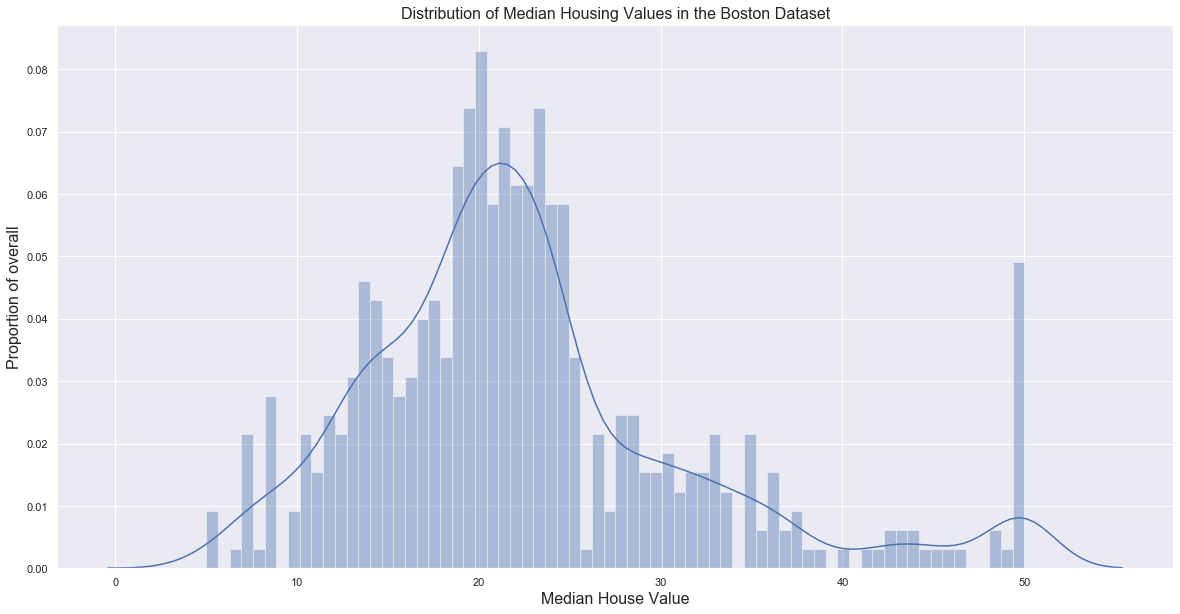

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
x = pd.Series(df['MEDV'])
ax = sns.distplot(x, bins=70, color='b')
plt.title('Distribution of Median Housing Values in the Boston Dataset', fontsize=16)
plt.ylabel('Proportion of overall', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
print('Plot 1. A histogram showing the distribution of median values of housing within the Boston dataset')

# Infer

## Is there a significant difference in median house prices between houses along the Charles river and those that aren't?
![title](CHAS.jpg)

###### A watercolor illustration made for the Boston Esplanade Association.FRANK COSTANTINO
###### https://www.bostonglobe.com/arts/2012/03/04/make-better-esplanade-harness-citizens-passion/Z8hyWWzjJbJ9vCcvvyNaiM/story.html

### Summary
Several Statisical Analysis Techniques were used to determine the probablity of there being no significant difference between the median value of houses along the Charles river and those house that where not, (i.e. the null hypothesis). If the probablity that the two groups are samples from the same population is less than 0.05 then the null hypothesis can be rejected and the conclusion made that, based on the available observations, that there **is** a significant difference between the median value of houses. 

The conclusion using a variety of statistical techniques for cross-validation is that there is a statistical difference in median values for houses located on the Charles river and houses not located on the Charles river based on the observations within this dataset. 

Let's begin with some descriptive statistics. The plot below tells us that significantly fewer houses in the dataset are located along the Charles river, 35 versus 471. Houses not along the Charles river seem to follow a positively skewed normal distribution with a positive skew. The histogram in Plot 2 for houses along the Charles river is not very informative and should not be used to draw any conclusions.

Some deeper statistical analysis will be beneficial. 

#### Descriptive Statistics
It is clear that housing along the Charles river (MEDV_river in Table 2) have a higher mean value and a greater proportion of housing in the 3rd quartile than housing not along the Charles river (MEDV_no_river in Table 2)

In [10]:
# Slice CHAS column according to boolean values. 1 = along river, 0 = not along river
river_stats = df[df['CHAS']==1].describe()
river_stats.rename(columns=lambda x:x+'_river',inplace=True) 
no_river_stats = df[df['CHAS']==0].describe()
no_river_stats.rename(columns=lambda x:x+'_no_river',inplace=True) 
# create a new array containing 
statistics = pd.concat([river_stats, no_river_stats], axis=1)

In [11]:
desc = statistics.loc[:, ['MEDV_river', 'MEDV_no_river']]
print("Table 2. Descriptive statistics for MEDV according to CHAS")
desc

Table 2. Descriptive statistics for MEDV according to CHAS


,MEDV_river,MEDV_no_river
count,35.000000,471.000000
mean,28.440000,22.093843
std,11.816643,8.831362
min,13.400000,5.000000
25%,21.100000,16.600000
50%,23.300000,20.900000
75%,33.150000,24.800000
max,50.000000,50.000000


Plot 2. Histograms showing the distribution of Median values of houses on the Charles river and not along the river


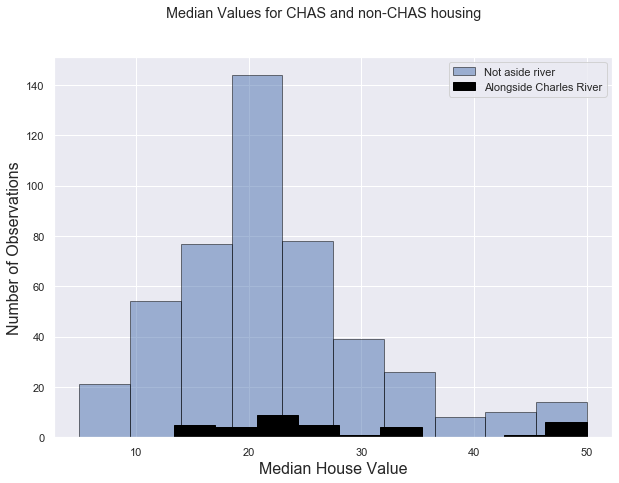

In [12]:
print('Plot 2. Histograms showing the distribution of Median values of houses on the Charles river and not along the river')
fig = plt.figure()
fig.suptitle('Median Values for CHAS and non-CHAS housing')
df[df['CHAS']==0].MEDV.plot(kind='hist',color='b',edgecolor='black',alpha=0.5,figsize=(10,7))
df[df['CHAS']==1].MEDV.plot(kind='hist',color='black',edgecolor='black', figsize=(10,7))
L = plt.legend()
L.get_texts()[0].set_text('Not aside river')
L.get_texts()[1].set_text('Alongside Charles River')
plt.ylabel('Number of Observations', fontsize=16)
plt.xlabel('Median House Value', fontsize=16)
plt.show()

Boxplots help us to visualise the distribution of Median housing values in the two samples. We can see that housing along the Charles river has a higher median value, as well as a greater spread or standard deviation from the mean value. Housing not along the Charles river has a small spread in values but a greater number of outliers. The boxplot is useful in visualising the data, however based solely on this data the Charles river housing could reasonably be argued to be within the range of outliers for houses not on the Charles river. 

Plot 3


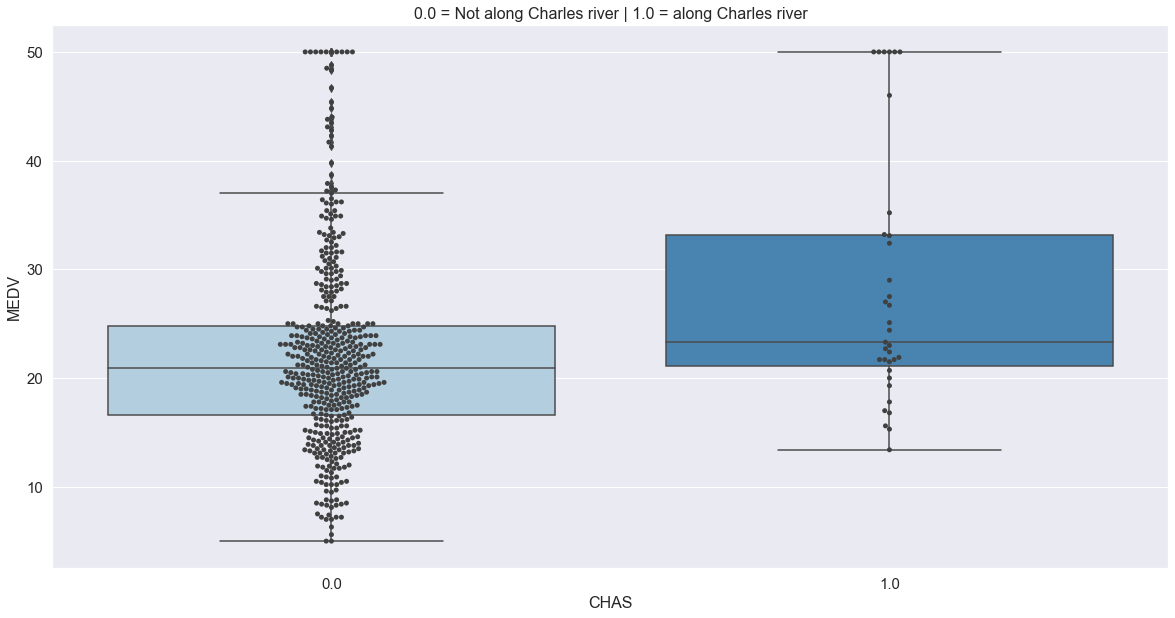

In [13]:
print('Plot 3')
ax = sns.boxplot(x="CHAS", y="MEDV", data=df, palette="Blues")
ax.axes.set_title("0.0 = Not along Charles river | 1.0 = along Charles river",fontsize=16)
ax.set_xlabel("CHAS",fontsize=16)
ax.set_ylabel("MEDV",fontsize=16)
ax.tick_params(labelsize=15)
ax = sns.swarmplot(x="CHAS", y="MEDV", data=df, color=".25")
plt.show()

#### t-test
The t-test compares the means of the Median Values for houses along the Charles river and those not along the Charles river to evaluate whether their means are statistically different from each other. Below an independent t-test is performed as both groups can be considered independent from each other. 

A pvalue of >0.05 allows us to reject the null hypothesis. According to the t-test the likelihood of both same being from within the same poplulation is 0.0036. The t-test assumes normally distributed samples, as we can see from the histogram in **Plot 3** both the groups have positive skew, with tail's and outliers extending to the right.

In [14]:
print('The pvalue below of >0.05 indicates that the two groups are not from the same sample')
stats.ttest_ind(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0], equal_var=False)

The pvalue below of >0.05 indicates that the two groups are not from the same sample


Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

This low pvalue gives good evidence that houses alongside the Charles river are more valuable because they are alongside the Charles river

#### ANOVA
Analysis of Variance (ANOVA) is another inferential statistical technique we can use to analyse whether there is a significant difference median house prices between houses that are along the Charles river and those that are not. 

ANOVA looks at the variation between the groups, and the variation within groups. It is normally used to compare means among more than two-groups. We use it here as a second point of reference since there is strong overlap between the two groups of housing types. 

Again the significant level is >0.05, in fact it is considerably less by being a negative value. We can again conslude that there is a significant between the median housing value of the two groups and infer that houses along the Charles river are move valuable.

In [15]:
stats.f_oneway(df['MEDV'][df['CHAS']==1], df['MEDV'][df['CHAS']==0])

F_onewayResult(statistic=15.971512420371962, pvalue=7.390623170520815e-05)

# Predict
![title](predict.jpg)
##### Ms Marvel (Carol Danvers) the Boston based Superhero with pre-cognative "seventh sense" powers. Perhaps she can make some predictions about housing in Boston too
##### Copyright https://www.marvel.com/characters/captain-marvel-carol-danvers/in-comics 

In [16]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
# insert link to pre-processing
import sklearn.preprocessing as pre

In [18]:
x = df.iloc[:, 0:13]
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
target = df.iloc[:, 13:14]
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


xscale = pd.DataFrame(pre.scale(df), columns=df.columns)

xscale.head()

# this is the preprocessing calculation manually, there are some rounding errors
(x - x.mean())/ x.std()

# means are practically zero
xscale.mean().round(10)

#### Fitting and Transforming

In [20]:
scaler = pre.StandardScaler()
scaler.fit(x)
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [21]:
xscale = pd.DataFrame(scaler.transform(x), columns=x.columns)
xscale

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


x.mean()

#### Whiting

In [22]:
x.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [23]:
import sklearn.decomposition as dec

In [24]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x)
xwhite = pd.DataFrame(pca.transform(x), columns=x.columns)
xwhite

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.681737,-0.070328,-0.110906,0.324032,-0.257641,-1.195502,-0.257642,1.774739,-1.069788,-0.302890,0.749064,-0.290887,0.606963
1,-0.960939,0.127958,-1.076024,0.079408,0.052369,-0.613999,-0.156852,0.296642,0.258499,1.196095,0.096360,-0.386434,-0.599819
2,-0.963338,0.178102,-0.585647,-0.629399,-0.013232,-1.119363,0.428840,0.165237,0.229360,0.837983,-0.925444,-0.437518,-0.081586
3,-1.082361,0.231504,-0.228412,-1.202960,0.214394,-1.318206,-0.491872,0.274068,0.587810,0.887470,-0.546818,-0.214018,0.790989
4,-1.081808,0.203619,-0.459975,-0.868201,0.249464,-1.091127,-0.763402,0.334618,0.587477,1.033557,-1.065225,-0.225982,0.643021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.789154,0.073129,-0.733316,-0.349447,-0.068129,0.027581,0.942339,0.108110,1.608370,-1.555624,-0.638012,-0.258742,1.083075
502,-0.793743,0.013147,-0.936627,-0.053825,-0.127177,-0.216900,0.946965,0.140667,1.715690,-1.508870,0.471572,-0.268371,0.831583
503,-0.787386,0.011866,-1.303356,0.494394,-0.335579,-1.104183,1.171877,0.195967,2.005277,-1.241822,-0.589854,-0.426902,0.779639
504,-0.782367,0.053780,-1.258023,0.429652,-0.297891,-0.930280,1.104906,0.202194,1.984588,-1.094030,-0.384357,-0.389392,0.816168


In [25]:
xwhite.corr().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
ZN,0.0,1.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
INDUS,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
CHAS,-0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
NOX,0.0,0.0,0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
RM,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
AGE,0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0
DIS,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,-0.0
RAD,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0
TAX,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,-0.0,0.0


In [26]:
from keras import Sequential
from keras.layers import Dense
from keras import metrics

#build our model
m = kr.models.Sequential()

m.add(kr.layers.Dense(5, input_dim=13, activation='tanh'))
m.add(kr.layers.Dense(5, activation='linear'))
m.add(kr.layers.Dense(5, activation='sigmoid'))
#m.add(kr.layers.Dense(30, activation='linear'))
#m.add(kr.layers.Dense(50, activation='linear'))
#m.add(kr.layers.Dense(20, activation='linear'))
#m.add(kr.layers.Dense(10, activation='linear'))
m.add(kr.layers.Dense(5, activation='linear'))
m.add(kr.layers.Dense(1, activation='linear'))

m.compile(loss='mean_squared_error', optimizer='adam', metrics=[metrics.mae, metrics.categorical_accuracy])

In [27]:
x = xwhite
y = target

In [28]:
m.fit(x, y,epochs=250, batch_size=10)

Epoch 1/250
506/506 [==============================] - 1s 1ms/step - loss: 591.1156 - mean_absolute_error: 22.4943 - categorical_accuracy: 1.0000
Epoch 2/250
506/506 [==============================] - 0s 142us/step - loss: 553.0585 - mean_absolute_error: 21.6605 - categorical_accuracy: 1.0000
Epoch 3/250
506/506 [==============================] - 0s 142us/step - loss: 505.8823 - mean_absolute_error: 20.5794 - categorical_accuracy: 1.0000
Epoch 4/250
506/506 [==============================] - 0s 126us/step - loss: 445.6186 - mean_absolute_error: 19.1061 - categorical_accuracy: 1.0000
Epoch 5/250
506/506 [==============================] - 0s 118us/step - loss: 375.7343 - mean_absolute_error: 17.2121 - categorical_accuracy: 1.0000
Epoch 6/250
506/506 [==============================] - 0s 144us/step - loss: 302.4505 - mean_absolute_error: 14.9978 - categorical_accuracy: 1.0000
Epoch 7/250
506/506 [==============================] - 0s 146us/step - loss: 233.9260 - mean_absolute_error: 12.62

506/506 [==============================] - 0s 116us/step - loss: 15.5159 - mean_absolute_error: 2.8295 - categorical_accuracy: 1.0000
Epoch 57/250
506/506 [==============================] - 0s 112us/step - loss: 15.0829 - mean_absolute_error: 2.7680 - categorical_accuracy: 1.0000
Epoch 58/250
506/506 [==============================] - 0s 112us/step - loss: 14.6696 - mean_absolute_error: 2.7528 - categorical_accuracy: 1.0000
Epoch 59/250
506/506 [==============================] - 0s 110us/step - loss: 14.2836 - mean_absolute_error: 2.7300 - categorical_accuracy: 1.0000
Epoch 60/250
506/506 [==============================] - 0s 120us/step - loss: 13.8597 - mean_absolute_error: 2.7042 - categorical_accuracy: 1.0000
Epoch 61/250
506/506 [==============================] - 0s 112us/step - loss: 13.5501 - mean_absolute_error: 2.6660 - categorical_accuracy: 1.0000
Epoch 62/250
506/506 [==============================] - 0s 116us/step - loss: 13.1436 - mean_absolute_error: 2.6580 - categorical_a

506/506 [==============================] - 0s 118us/step - loss: 6.9707 - mean_absolute_error: 1.9748 - categorical_accuracy: 1.0000
Epoch 113/250
506/506 [==============================] - 0s 114us/step - loss: 6.8281 - mean_absolute_error: 1.9777 - categorical_accuracy: 1.0000
Epoch 114/250
506/506 [==============================] - 0s 114us/step - loss: 6.8977 - mean_absolute_error: 1.9681 - categorical_accuracy: 1.0000
Epoch 115/250
506/506 [==============================] - 0s 118us/step - loss: 6.8166 - mean_absolute_error: 1.9804 - categorical_accuracy: 1.0000
Epoch 116/250
506/506 [==============================] - 0s 110us/step - loss: 6.8406 - mean_absolute_error: 1.9680 - categorical_accuracy: 1.0000
Epoch 117/250
506/506 [==============================] - 0s 128us/step - loss: 6.8299 - mean_absolute_error: 1.9841 - categorical_accuracy: 1.0000
Epoch 118/250
506/506 [==============================] - 0s 114us/step - loss: 6.8048 - mean_absolute_error: 1.9549 - categorical_ac

506/506 [==============================] - 0s 118us/step - loss: 6.1259 - mean_absolute_error: 1.8758 - categorical_accuracy: 1.0000
Epoch 168/250
506/506 [==============================] - 0s 120us/step - loss: 6.0856 - mean_absolute_error: 1.8803 - categorical_accuracy: 1.0000
Epoch 169/250
506/506 [==============================] - 0s 110us/step - loss: 6.1594 - mean_absolute_error: 1.8674 - categorical_accuracy: 1.0000
Epoch 170/250
506/506 [==============================] - 0s 116us/step - loss: 6.1196 - mean_absolute_error: 1.8769 - categorical_accuracy: 1.0000
Epoch 171/250
506/506 [==============================] - 0s 114us/step - loss: 6.0932 - mean_absolute_error: 1.8953 - categorical_accuracy: 1.0000
Epoch 172/250
506/506 [==============================] - 0s 112us/step - loss: 6.1784 - mean_absolute_error: 1.8789 - categorical_accuracy: 1.0000
Epoch 173/250
506/506 [==============================] - 0s 116us/step - loss: 6.0955 - mean_absolute_error: 1.8844 - categorical_ac

506/506 [==============================] - 0s 124us/step - loss: 5.9119 - mean_absolute_error: 1.8957 - categorical_accuracy: 1.0000
Epoch 223/250
506/506 [==============================] - 0s 122us/step - loss: 5.8476 - mean_absolute_error: 1.8385 - categorical_accuracy: 1.0000
Epoch 224/250
506/506 [==============================] - 0s 114us/step - loss: 5.9514 - mean_absolute_error: 1.8897 - categorical_accuracy: 1.0000
Epoch 225/250
506/506 [==============================] - 0s 144us/step - loss: 5.8977 - mean_absolute_error: 1.8610 - categorical_accuracy: 1.0000
Epoch 226/250
506/506 [==============================] - 0s 150us/step - loss: 5.8599 - mean_absolute_error: 1.8564 - categorical_accuracy: 1.0000
Epoch 227/250
506/506 [==============================] - 0s 360us/step - loss: 5.8335 - mean_absolute_error: 1.8679 - categorical_accuracy: 1.00000s - loss: 5.8501 - mean_absolute_error: 1.8668 - categorical_accuracy: 1.00
Epoch 228/250
506/506 [==============================] -

In [29]:
p = m.predict(x)

In [30]:
prediction_output = pd.DataFrame(p, columns=['P_MEDV'])


In [31]:
output = pd.concat([df.iloc[:, 0:14], prediction_output], axis=1)

In [32]:
output

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,P_MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,26.091537
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,25.878180
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,33.989494
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,32.413647
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,30.961273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,25.725761
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,18.487881
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,23.842319
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,22.370068


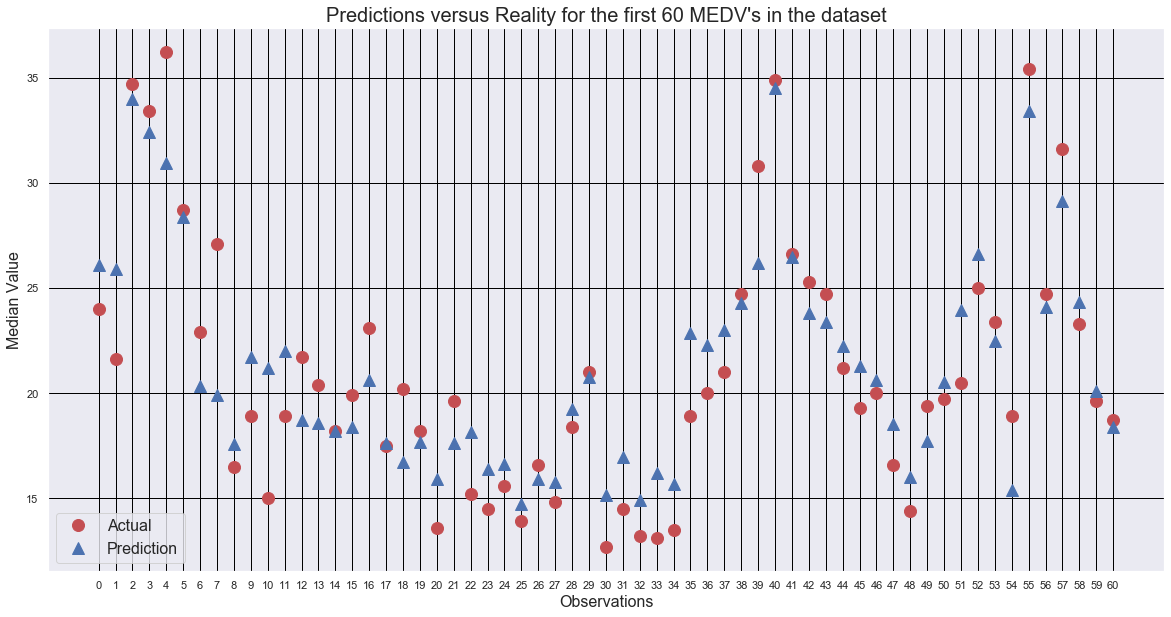

In [33]:
B_MEDV = output.loc[:60, 'MEDV'] 
P_MEDV = output.loc[:60, 'P_MEDV'] 

fig, ax = plt.subplots()
ax.plot(B_MEDV, color='r', marker='o', markersize=12, linestyle='', label="Actual")
ax.plot(P_MEDV, color='b', marker='^', markersize=12, linestyle='', label="Prediction")
ax.grid(color='black', linestyle='-', linewidth=1)
plt.xlabel("Observations", fontsize=16)
plt.ylabel("Median Value", fontsize=16)
plt.title("Predictions versus Reality for the first 60 MEDV's in the dataset", fontsize=20)
plt.legend(loc="best", fontsize=16)
plt.xticks(np.arange(0, 61, step=1))
plt.show()

In [34]:
output['DIFF'] = output['MEDV'] - output['P_MEDV']

In [35]:
output['DIFF'].describe().round(2)

count    506.00
mean      -0.18
std        2.35
min       -6.60
25%       -1.78
50%       -0.37
75%        1.22
max       10.43
Name: DIFF, dtype: float64

### References
https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class

https://blog.datarobot.com/ordinary-least-squares-in-python

https://pythonfordatascience.org/anova-python/#data

https://en.wikipedia.org/wiki/Ordinary_least_squares

https://stackoverflow.com/questions/49473757/python-degrees-of-freedom

https://medium.com/@robertjohn_15390/simple-housing-price-prediction-using-neural-networks-with-tensorflow-8b486d3db3ca

(1997) The problem of multicollinearity. In: Understanding Regression Analysis. Springer, Boston, MA

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a

https://www.kaggle.com/prasadperera/the-boston-housing-dataset

Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

https://keras.rstudio.com/articles/tutorial_basic_regression.html

https://github.com/topics/boston-housing-price-prediction?o=desc&s=updated